# Import Libraries

In [2]:
# pandas (pd) library: Used for data manipulation, reading CSV files, creating DataFrames, handling missing values, etc.
import pandas as pd

# matplotlib.pyplot (plt) library: Used for creating various plots and visualizations like line charts, scatter plots, etc.
import matplotlib.pyplot as plt

In [3]:
# plotly.express (px) library: Used for creating interactive visualizations like scatter plots, heatmaps, etc. (optional, not used in this code)
import plotly.express as px

# plotly.graph_objects (go) library: Used for creating more complex and customizable plotly visualizations. (optional, not used in this code)
import plotly.graph_objects as go

# statsmodels.tsa.seasonal (seasonal_decompose): Used for performing seasonal decomposition on time series data to separate trend, seasonal component, and remainder.
from statsmodels.tsa.seasonal import seasonal_decompose

# statsmodels.graphics.tsaplots (plot_pacf): Used for plotting partial autocorrelation (PACF) plots to help identify the order of differencing (d) in ARIMA models. (not used in this code)
from statsmodels.graphics.tsaplots import plot_pacf

# statsmodels.tsa.arima_model (ARIMA): Used for building and fitting ARIMA models for time series forecasting.
from statsmodels.tsa.arima_model import ARIMA

# statsmodels.api (sm): Used for various statistical functions and model fitting in statsmodels.
import statsmodels.api as sm

In [4]:
# Read website traffic data from CSV file
data = pd.read_csv(r'C:\Users\91960\OneDrive\Desktop\Project\PYTHON\Website Traffic Analysis\traffic.csv')
data

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0
...,...,...
1911,NaN,NaN
1912,NaN,NaN
1913,NaN,NaN
1914,NaN,NaN


# Cleaning data

In [5]:
# Check for missing values in the data
data.isnull().any()

Date      True
Visits    True
dtype: bool

In [6]:
# Get the data shape (number of rows and columns)
data.shape

(1916, 2)

In [7]:
# Create a new DataFrame without missing values (dropna removes rows with missing values)
data1 = data.dropna()

In [8]:
# Get the data shape (number of rows and columns)
data1.shape

(232, 2)

# Data transformation

In [9]:
# Get information about the data (data types, non-null values, etc.)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    232 non-null    object 
 1   Visits  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


# Data Analysis

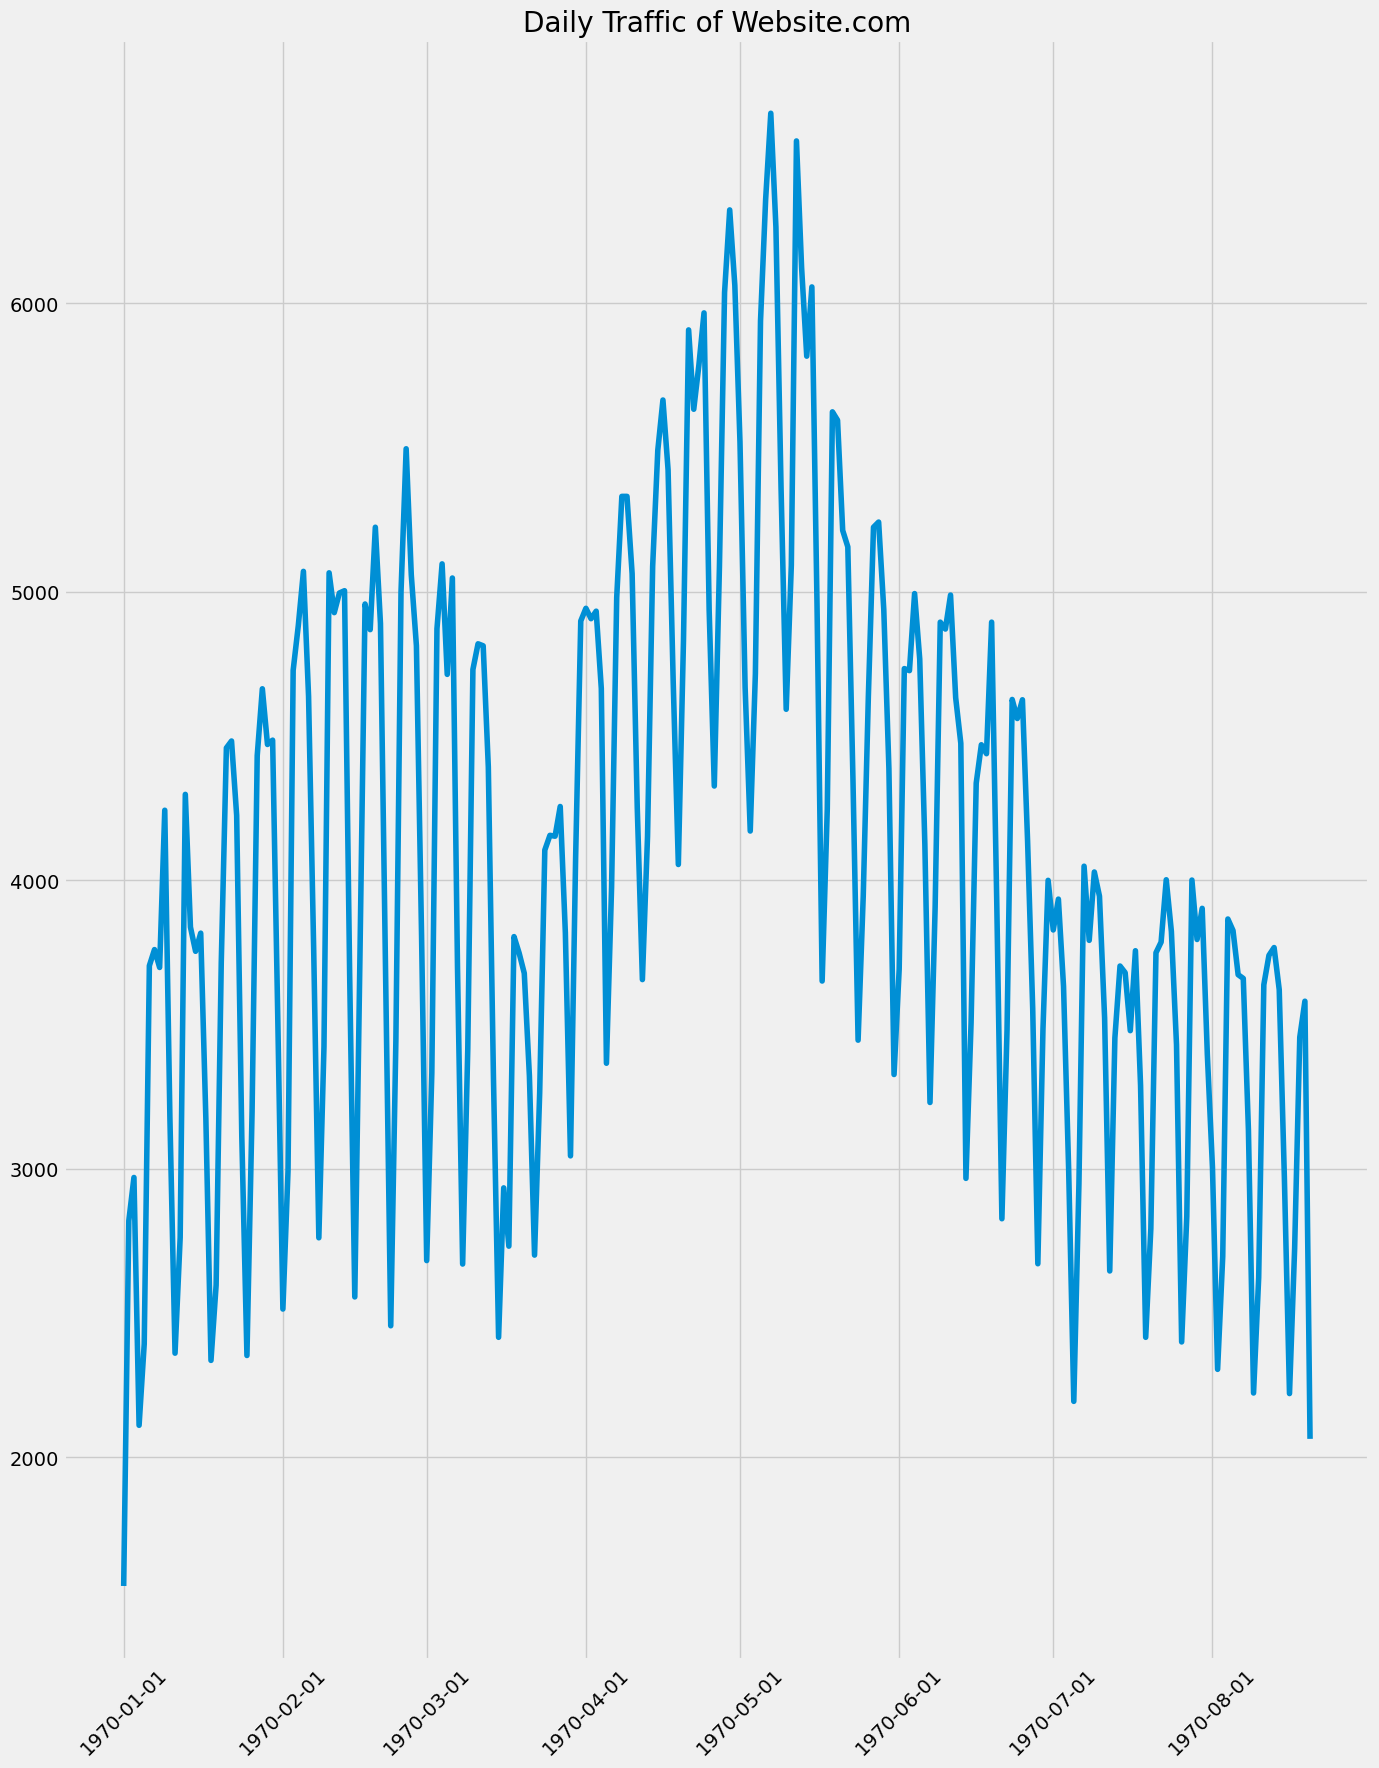

In [10]:
# Set a plotting style for consistency
plt.style.use('fivethirtyeight')

# Create a larger figure for better visualization
plt.figure(figsize = (15,20))

# Plot the daily website visits
plt.plot(data1['Date'], data1['Visits'])

# Set the title of the plot
plt.title('Daily Traffic of Website.com')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Optionally, you can format the date labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Optionally, you can set the number of ticks
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

plt.show()

<Figure size 640x480 with 0 Axes>

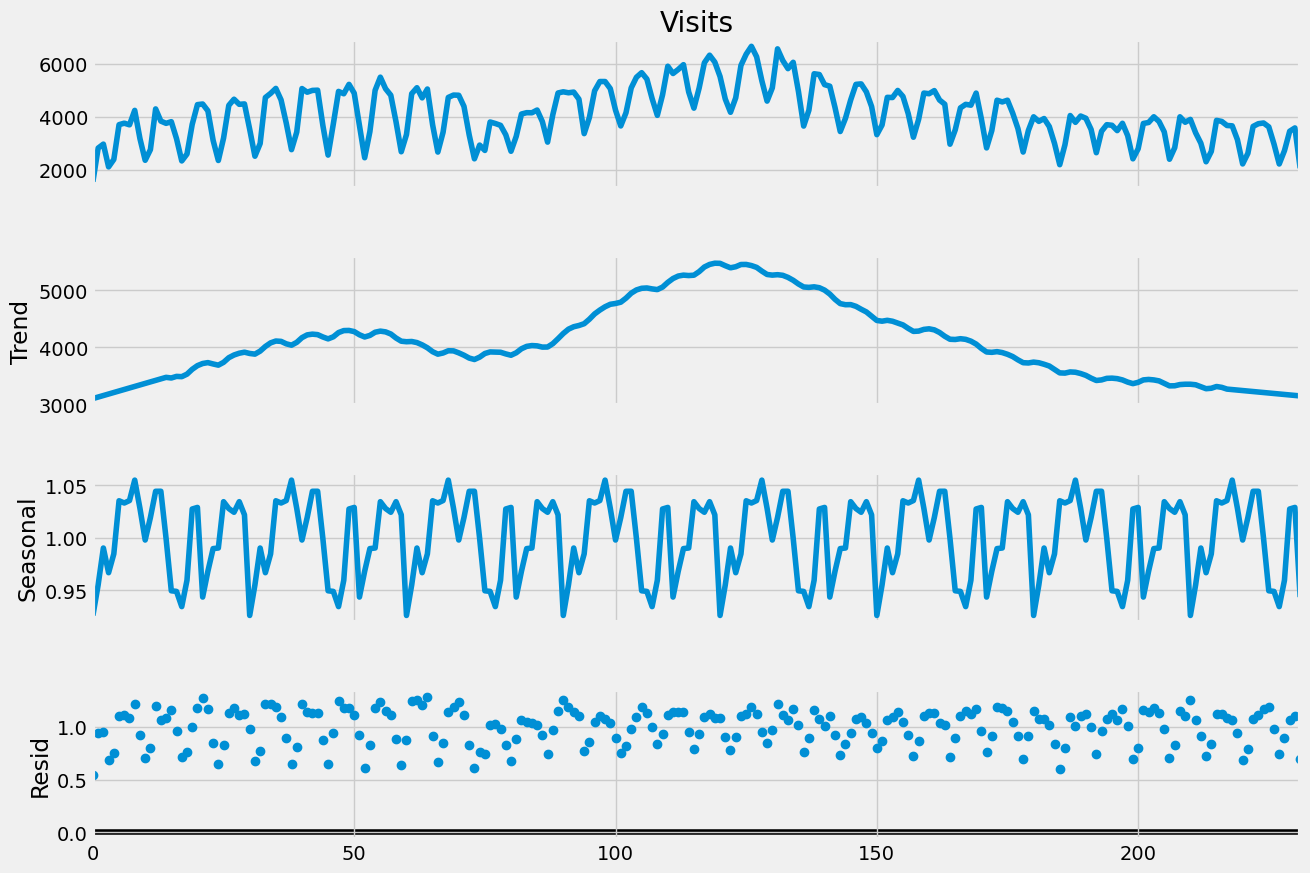

In [12]:
# Perform seasonal decomposition on the 'Visits' column with a multiplicative model
# Extrapolate trend using frequency and period of 30 days (assuming monthly seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data1['Visits'], model = 'multiplicative', extrapolate_trend = 'freq', period = 30)

# Create a figure for seasonal decomposition plots
fig = plt.figure()

# Plot the seasonal decomposition components (trend, seasonal, remainder)
fig = result.plot()

# Set the figure size for better viewing
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

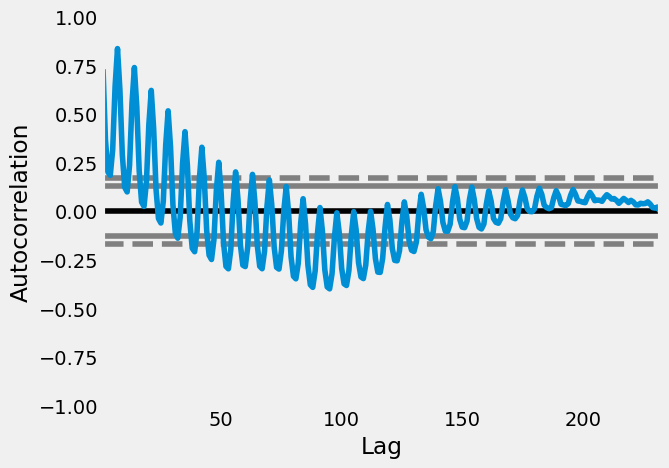

In [14]:
# Plot the autocorrelation of the 'Visits' data
pd.plotting.autocorrelation_plot(data1['Visits'])

In [16]:
# Define ARIMA model parameters (tentatively set p=5, d=1, q=2)
p, d, q = 5, 1, 2

# Create a SARIMAX model for time series forecasting
# Specify order (p, d, q) for non-seasonal components and seasonal order for seasonality
model = sm.tsa.statespace.SARIMAX(data1['Visits'], order = (p,d,q), seasonal_order = (p,d,q,12))

# Fit the model to the data
model = model.fit()

# Print a summary of the fitted model (coefficients, AIC, etc.)
model.summary()

C:\Users\91960\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Visits   No. Observations:                  232
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1619.955
Date:                            Tue, 04 Jun 2024   AIC                           3269.911
Time:                                    12:19:34   BIC                           3320.747
Sample:                                         0   HQIC                          3290.442
                                            - 232                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0957      0.139      0.690      0.490      -0.176       0.367
ar.L2         -0.8156      0.102     -8.002      0.000      -1.015      -0.616
ar.L3         -0.2650      0.166     -1.600      0.110      -0.590       0.060
ar.L4         -0.3903      0.103     -3.790      0.000      -0.592      -0.188
ar.L5         -0.6580      0.127     -5.201      0.000      -0.906      -0.410
ma.L1         -0.3005      0.180     -1.673      0.094      -0.652       0.052
ma.L2          0.4085      0.130      3.134      0.002       0.153       0.664
ar.S.L12      -0.8945      6.866     -0.130      0.896     -14.351      12.562
ar.S.L24       0.0077      0.422      0.018      0.985      -0.819       0.835
ar.S.L36      -0.1263      0.340     -0.371      0.711      -0.793       0.541
ar.S.L48      -0.1538      0.922     -0.167      0.867      -1.961       1.653
ar.S.L60      -0.0362      0.445     -0.081      0.935      -0.907       0.835
ma.S.L12       0.0927      6.870      0.013      0.989     -13.373      13.558
ma.S.L24      -0.7408      5.447     -0.136      0.892     -11.417       9.936
sigma2      2.071e+05   2.88e+04      7.201      0.000    1.51e+05    2.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                37.01
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.74
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Generate predictions for the next 50 days after the end of the data
predictions = model.predict(len(data1), len(data1)+50)
predictions

232    2354.019220
233    2249.117243
234    1948.574384
235    2428.385195
236    3520.564052
237    3213.994667
238    2272.677008
239    2240.270009
240    2170.471795
241    1855.270730
242    2415.315697
243    2944.518902
244    2768.669025
245    2119.863354
246    2065.021038
247    2123.647386
248    1880.976710
249    2325.899371
250    2911.669260
251    2791.950638
252    2088.042408
253    1977.839752
254    1947.641777
255    1496.779465
256    1970.500494
257    2661.071741
258    2602.094855
259    2088.909767
260    1843.362093
261    1804.309538
262    1609.624966
263    2095.153959
264    2525.819505
265    2490.875252
266    1999.467301
267    1615.059574
268    1562.338423
269    1547.630508
270    1977.528837
271    2456.177744
272    2304.209355
273    1918.926153
274    1631.091102
275    1650.967988
276    1522.244834
277    1917.783903
278    2304.709958
279    1983.000681
280    1639.545739
281    1491.590930
282    1504.728218
Name: predicted_mean, dtype: fl

<Axes: >

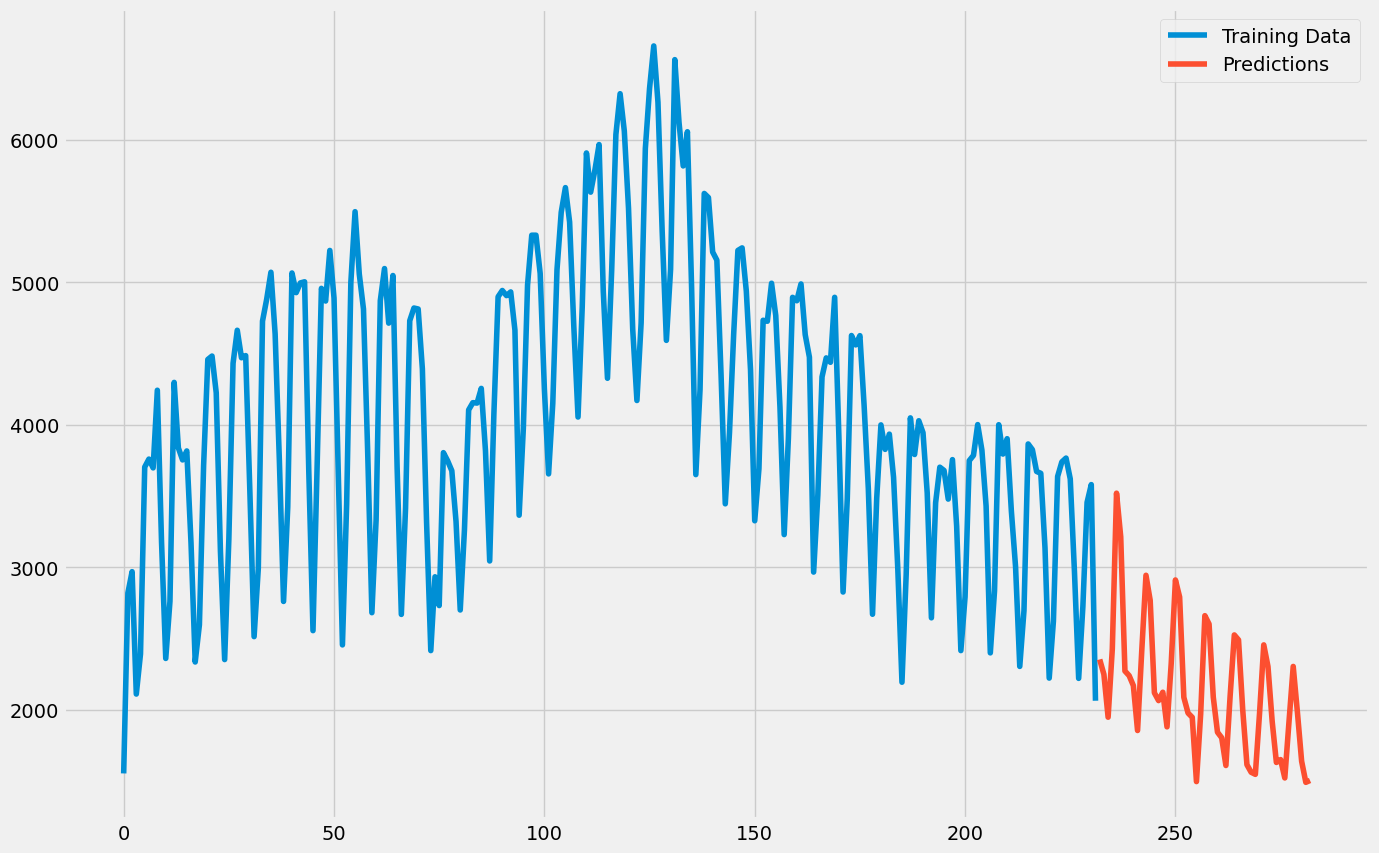

In [19]:
# Plot the actual visits (training data) and predicted visits
data1['Visits'].plot(legend = True, label = 'Training Data', figsize = (15,10))
predictions.plot(legend = True, label = 'Predictions')